### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?



1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [4]:
pd.set_option('display.max_rows', None)

In [3]:
file = 'amz_uk_price_prediction_dataset.csv'
df_amazon = pd.read_csv(file)

In [5]:
# Frequency table for 'category'
frequency_table = df_amazon['category'].value_counts()
pd.DataFrame(frequency_table)

,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
Manicure & Pedicure Products,18940
Skin Care,18769
Make-up,18756
Hair Care,18735


In [9]:
#the top 5 most listed product categories 
top_categories = frequency_table.head(5)
top_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


C:\Users\anano\AppData\Local\Temp\ipykernel_15176\2762365806.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="Set3")


<Axes: xlabel='category'>

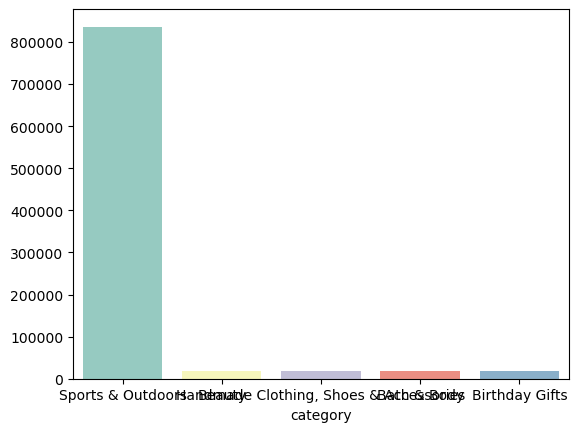

In [15]:
# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
sns.barplot(x=top_categories.index, y=top_categories.values, palette="Set3")

<Axes: ylabel='count'>

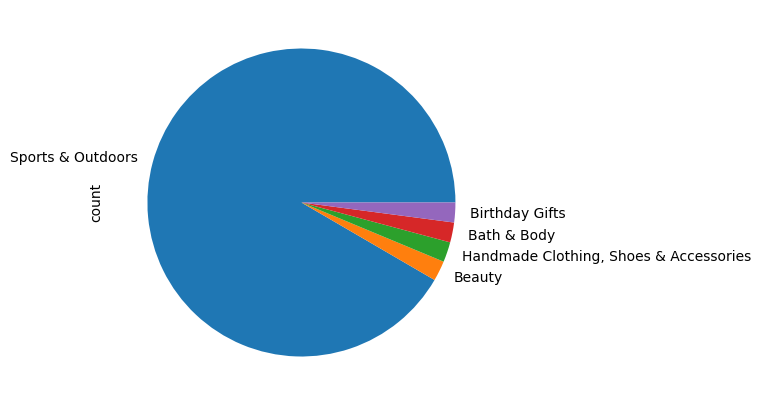

In [19]:
# pie chart
top_categories.plot.pie(figsize=(5, 5)) # dominates the sports and outdoor category


### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?



In [26]:
# Calculate mean, median, and mode for the price column
mean_price = df_amazon['price'].mean()
median_price = df_amazon['price'].median()
mode_price = df_amazon['price'].mode()[0]
mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

In [27]:
# Display the results
print(f"Mean price: {mean_price}")
print(f"Median price: {median_price}")
print(f"Mode price: {mode_price}")

# Comparison
print(f"\nThe average price point is {mean_price}, whereas the most common price point (mode) is {mode_price}.")

Mean price: 89.24380943923663
Median price: 19.09
Mode price: 9.99

The average price point is 89.24380943923663, whereas the most common price point (mode) is 9.99.


2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?


In [31]:
variance_price = df_amazon['price'].var()
std_dev_price = df_amazon['price'].std()
min_price = df_amazon['price'].min()
max_price = df_amazon['price'].max()
range_price = max_price - min_price
# Interquartile range (IQR)
q1 = df_amazon['price'].quantile(0.25)
q3 = df_amazon['price'].quantile(0.75)
iqr_price = q3 - q1

# Display the results
print(f"Variance: {variance_price}")
print(f"Standard Deviation: {std_dev_price}")
print(f"Range: {range_price}")
print(f"Interquartile Range (IQR): {iqr_price}")

Variance: 119445.48532256528
Standard Deviation: 345.60886175352226
Range: 100000.0
Interquartile Range (IQR): 36.0


In [32]:
'''The product prices exhibit **significant variation**, driven by the following factors:

- **High Variance (119,445.49)** and **Standard Deviation (345.61)**: 
These suggest that prices deviate widely from the average, indicating a broad spread.
- **Large Range (100,000)**: 
This shows a substantial gap between the lowest and highest prices, pointing to extreme price differences.
- **Moderate IQR (36)**: 
While the overall price spread is large, the middle 50% of prices are more tightly clustered, meaning most products
 fall within a relatively narrow price band.

### Conclusion:
The prices are highly varied, with a few outliers (likely high-priced products) significantly widening the overall spread, 
while the majority of prices are more consistent.'''

'The product prices exhibit **significant variation**, driven by the following factors:\n\n- **High Variance (119,445.49)** and **Standard Deviation (345.61)**: \nThese suggest that prices deviate widely from the average, indicating a broad spread.\n- **Large Range (100,000)**: \nThis shows a substantial gap between the lowest and highest prices, pointing to extreme price differences.\n- **Moderate IQR (36)**: \nWhile the overall price spread is large, the middle 50% of prices are more tightly clustered, meaning most products\n fall within a relatively narrow price band.\n\n### Conclusion:\nThe prices are highly varied, with a few outliers (likely high-priced products) significantly widening the overall spread, \nwhile the majority of prices are more consistent.'


3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 
